# Diabetes Risk Prediction Using Machine Learning

## Step 1: Import Libraries
We begin by importing the necessary libraries for data manipulation, visualization, preprocessing, and modeling.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve

# Models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

## Step 2: Load and Inspect the Dataset
Load the dataset and inspect its structure to understand the features and target variable.

In [3]:
# Load the dataset
data = pd.read_csv('F:/diabetes.csv')  # Replace with your dataset path

# Inspect the first few rows
print(data.head())

# Check dataset information (data types, missing values, etc.)
print(data.info())

# Summary statistics
print(data.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

## Step 3: Exploratory Data Analysis (EDA)
Perform EDA to understand the relationships between features and the target variable.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


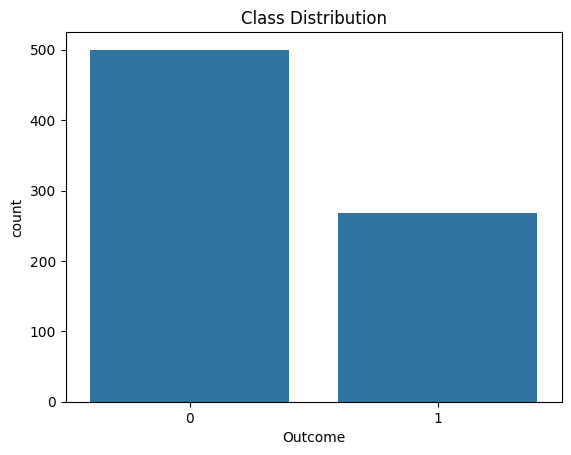

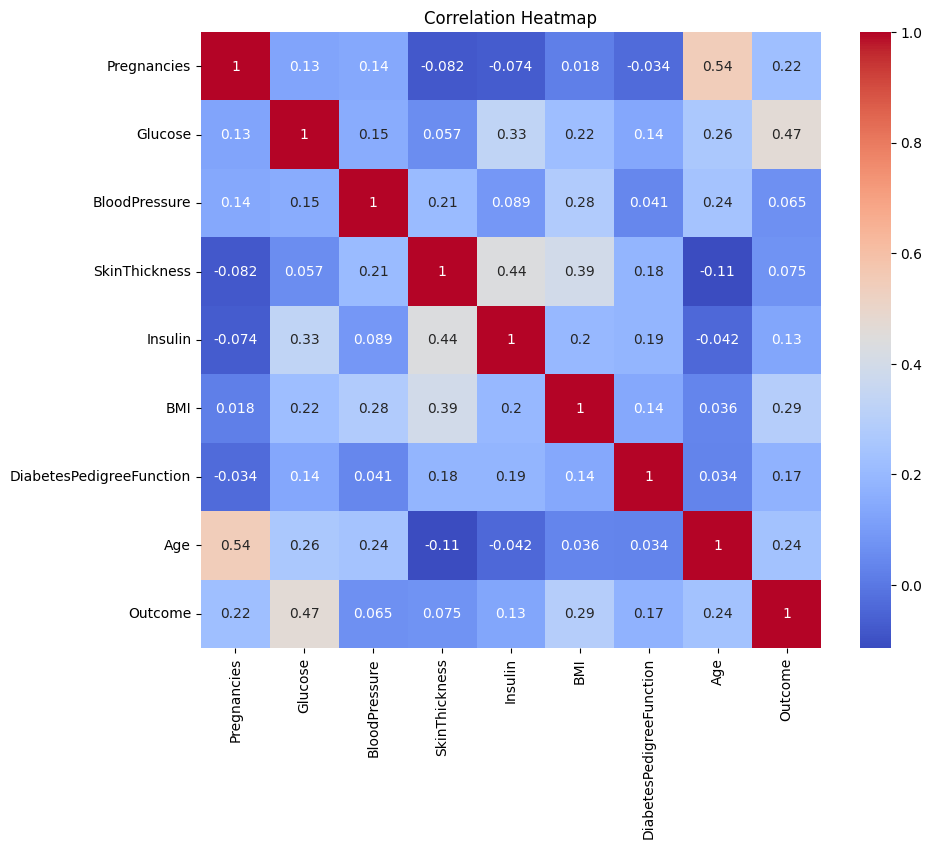

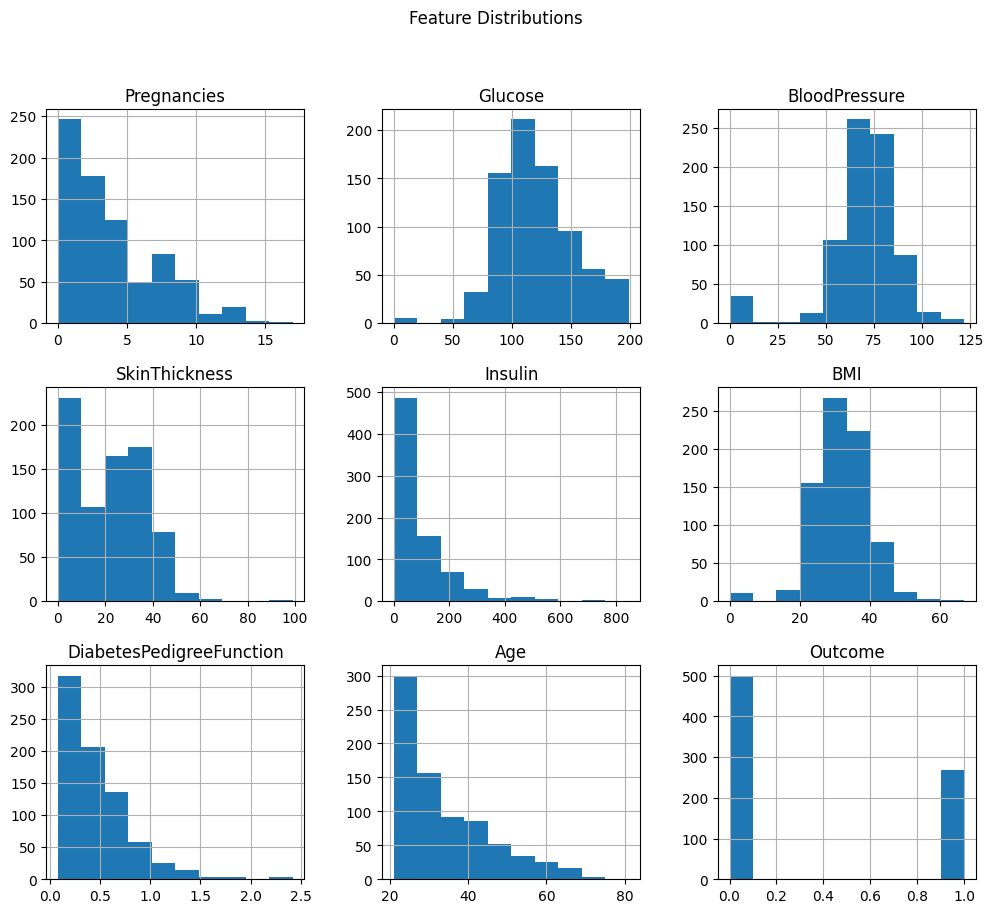

In [4]:
# Check for missing values
print(data.isnull().sum())

# Visualize class distribution (Outcome)
sns.countplot(x='Outcome', data=data)
plt.title('Class Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Feature distributions
data.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()

## Step 4: Feature Selection and Scaling
Prepare the data for modeling by selecting relevant features and scaling the data.

In [5]:
# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 5: Train Gradient Boosting Model (XGBoost)
Train an XGBoost model and evaluate its performance.


F1 Score: 0.6153846153846154
AUC-ROC: 0.766574839302112
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



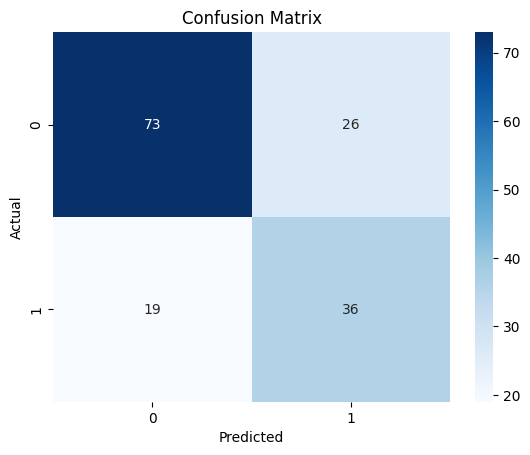

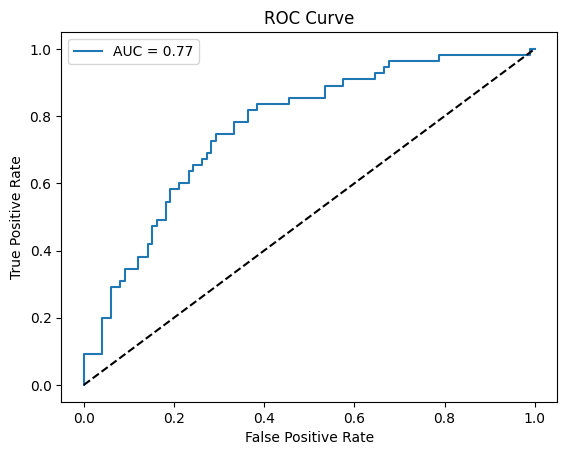

In [6]:
# Initialize and train the XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred_xgb)
roc_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(classification_report(y_test, y_pred_xgb))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Step 6: Train Support Vector Machine (SVM)
Train an SVM model and evaluate its performance.

In [7]:
# Initialize and train the SVM model
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred_svm)
roc_auc = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(classification_report(y_test, y_pred_svm))

F1 Score: 0.5961538461538461
AUC-ROC: 0.8045913682277318
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



## Step 7: Train Neural Network
Train a simple neural network using MLPClassifier.

In [8]:
# Initialize and train the Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_pred_mlp)
roc_auc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
print(f"F1 Score: {f1}")
print(f"AUC-ROC: {roc_auc}")
print(classification_report(y_test, y_pred_mlp))

F1 Score: 0.6296296296296297
AUC-ROC: 0.793939393939394
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



## Step 8: Compare Models
Compare the F1 scores and AUC-ROC values of all models to determine the best-performing one.

In [9]:
# Compare model performance
models = ['XGBoost', 'SVM', 'Neural Network']
f1_scores = [f1_score(y_test, y_pred_xgb), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_mlp)]
auc_roc_scores = [roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]),
                  roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]),
                  roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])]

comparison = pd.DataFrame({'Model': models, 'F1 Score': f1_scores, 'AUC-ROC': auc_roc_scores})
print(comparison)

            Model  F1 Score   AUC-ROC
0         XGBoost  0.615385  0.766575
1             SVM  0.596154  0.804591
2  Neural Network  0.629630  0.793939


## Step 9: Provide Insights
Based on the best-performing model, extract feature importance and provide actionable insights.

                    Feature  Importance
1                   Glucose    0.259786
7                       Age    0.138610
5                       BMI    0.135555
4                   Insulin    0.102135
6  DiabetesPedigreeFunction    0.096436
0               Pregnancies    0.092735
3             SkinThickness    0.092384
2             BloodPressure    0.082359


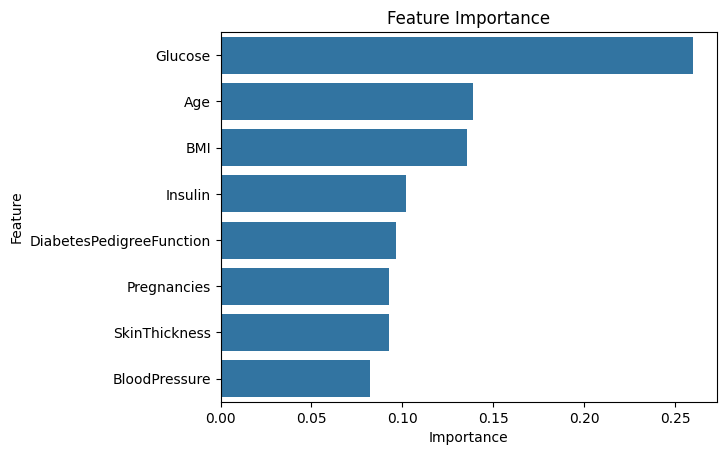

In [10]:
# Feature importance from XGBoost
feature_importance = pd.DataFrame({'Feature': data.drop('Outcome', axis=1).columns,
                                   'Importance': xgb.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

# Visualize feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

## Description :
-**Feature importance helps identify the most significant predictors of the disease.**

-**Healthcare professionals can focus on these features for early detection and prevention.**
## Final Deliverable
The final deliverable is a trained machine learning model that predicts the likelihood of diabetes based on medical data. The model provides actionable insights for healthcare professionals, such as identifying key risk factors and thresholds for early intervention.